# Intro to Statistics and Data Analysis

## Contents
+ Intro to basic concepts: samples, populations, experiments, and descriptive and inferencial statistics.
+ Measures of location: sample mean and median. The trimmed mean.
+ Measures of variability: sample range, variance, and standard deviation.
+ Visualization of data: Scatter plots, stem-and-leaf plots, histograms, box-and-whisker/box plots.
+ Intro to quartiles and percentiles

## Concepts Overview

**Statistical methods** are designed to contribute to the process of making judgements in the face of **uncertainty** and **variation**.

Information is gathered in the form of **samples**, or collections of observations.

Samples are collected from **populations**, which are collections of all individual items of a particular type.

There are two types of experiments that can be carried out:

+ **Experimental design** (sometimes called **Designed Experiments**) is used when a scientist can systematically move factors to whatever levels are suggested according to whatever prescription is desired.

+ **Observational study** is a different type of experiment in which data are collected in the field but factor levels cannot be preselected.

**Descriptive statistics** are useful to gain some sort of summary of a set of data represented in a sample. These *single-number* statistics give a sense of center of the location of the data, variability in the data, and the general nature of distribution of observations in the sample.

**Inferencial statistics** are the techniques that allow us to go beyond merely reporting data (descriptive statistics) to drawing conclusions or inferences about the scientific system. Statisticians make use of fundamental laws of probability and statistical inference to draw conclusions about scientific systems.


A thorough grounding of the fundamental notions of probability are required to allow the reader to have a better understanding of statistical inference. That will also allow for the quantification of the strength or confidence in our conclusions.

## Measures of Location: The Sample Mean and Median

Measures of location are designed to provide the analyst with some quantitative values of where the center, or some other location, of data is located.

### The Sample Mean
The sample mean is the numerical average of a given sample.

Suppose that the observations in a sample are $ x_1, \hspace{1ex} x_2, \hspace{1ex} \ldots  , \hspace{1ex} x_n $. The sample mean (or mean) denoted by $ \bar{x} $ is:

$$
\bar{x} = \sum_{i=1}^{n} \frac{x_i}{n} = \frac{x_1 + x_2 + \ldots + x_n}{n}
$$

### The Sample Median

The sample median reflects the central tendency of the sample in a way that is uninfluenced by extreme values or outliers.

Given that the observations in a sample are $ x_1, \hspace{1ex} x_2, \hspace{1ex}, \ldots , \hspace{1ex} x_n $, arranged in increasing order of magnitude, the sample median (or median) denoted by $ \tilde{x} $ is:

$$
\tilde{x} = \begin{cases}
x_{\frac{n + 1}{2}} \hspace{10ex} \text{ if n is odd} \\
\frac{1}{2}(x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}) \hspace{1ex} \text{ if n is even}
\end{cases}
$$

### Example: Calculate the sample mean and median

Calculate the sample mean and median of the following data set: 1.7, 2.2, 3.9, 3.11, and 14.7

We can implement a couple of functions `sample_mean()` and `sample_median()` according to the formulas above. 

| NOTE |
| :--- |
| The dataset given is not sorted in increasing order of magnitude. We will need to arrange the items before computing the median. |

In [1]:
data_set = [1.7, 2.2, 3.9, 3.11, 14.7]

def sample_mean(sample):
    return sum(sample) / len(sample)

def sample_median(sample):
    sorted_sample = sorted(sample)
    if len(sorted_sample) % 2 == 1:
        return sorted_sample[len(sorted_sample) // 2]
    else:
        return 1 / 2 * (sorted_sample[(len(sorted_sample) // 2) - 1] + sorted_sample[len(sorted_sample) // 2])

print(f"mean={sample_mean(data_set)}")
print(f"median={sample_median(data_set)}")


mean=5.122
median=3.11


As you can imagine, it would be better to use oob functions to compute those values. The statistics module provide a `mean` function and a few `median` variations.

Note that for the `median` function to return the correct results, the data set is not required to be sorted.

In [2]:
from statistics import mean, median_low, median_high, median, median_grouped

data_set = [1.7, 2.2, 3.9, 3.11, 14.7]

print(len(data_set))

sample_mean = mean(data_set)
sample_median = median(data_set)
sample_median_low = median_low(data_set)
sample_median_high = median_high(data_set)
sample_median_grouped = median_grouped(data_set)

print(f"mean={sample_mean}")
print(f"median={sample_median}")
print(f"median_low={sample_median_low}")
print(f"median_high={sample_median_high}")
print(f"median_grouped={sample_median_grouped}")

5
mean=5.122
median=3.11
median_low=3.11
median_high=3.11
median_grouped=3.11


### Example: Calculate the sample mean and sample median

Calculate the sample mean and sample median of the following data set corresponding to some weight measurements carried out of some flower stems that had been treated with and without a herbicide.

| No herbicide | Herbicide |
| :---------- | :------- |
| 0.32 | 0.26 |
| 0.53 | 0.43 |
| 0.28 | 0.47 |
| 0.37 | 0.49 |
| 0.47 | 0.52 |
| 0.43 | 0.75 |
| 0.36 | 0.79 |
| 0.42 | 0.86 |
| 0.38 | 0.62 |
| 0.43 | 0.46 |

What conclusions can you derive from the results?

To confirm that my implementation is correct, I will use my custom implementation of sample_mean and sample_median, and then validate that I get the same results with the `statistics` package:

In [3]:
def sample_mean(sample):
    return sum(sample) / len(sample)

def sample_median(sample):
    sorted_sample = sorted(sample)
    if len(sorted_sample) % 2 == 1:
        return sorted_sample[len(sorted_sample) // 2]
    else:
        return 1 / 2 * (sorted_sample[(len(sorted_sample) // 2) - 1] + sorted_sample[len(sorted_sample) // 2])

no_herbicide_data_set = [0.32, 0.53, 0.28, 0.37, 0.47, 0.43, 0.36, 0.42, 0.38, 0.43]
herbicide_data_set = [0.26, 0.43, 0.47, 0.49, 0.52, 0.75, 0.79, 0.86, 0.62, 0.46]

no_herb_mean = sample_mean(no_herbicide_data_set)
no_herb_median = sample_median(no_herbicide_data_set)

herb_mean = sample_mean(herbicide_data_set)
herb_median = sample_median(herbicide_data_set)

print("=== no herbicide")
print(f"Mean={round(no_herb_mean, 3)}")
print(f"Median={round(no_herb_median, 3)}")

print("\n=== herbicide")
print(f"Mean={round(herb_mean, 3)}")
print(f"Median={round(herb_median, 3)}")



=== no herbicide
Mean=0.399
Median=0.4

=== herbicide
Mean=0.565
Median=0.505


Now, with the `statistics` package:

In [4]:
from statistics import mean, median

no_herbicide_data_set = [0.32, 0.53, 0.28, 0.37, 0.47, 0.43, 0.36, 0.42, 0.38, 0.43]
herbicide_data_set = [0.26, 0.43, 0.47, 0.49, 0.52, 0.75, 0.79, 0.86, 0.62, 0.46]

no_herb_mean = mean(no_herbicide_data_set)
no_herb_median = median(no_herbicide_data_set)

herb_mean = mean(herbicide_data_set)
herb_median = median(herbicide_data_set)

print("=== no herbicide")
print(f"Mean={round(no_herb_mean, 3)}")
print(f"Median={round(no_herb_median, 3)}")

print("\n=== herbicide")
print(f"Mean={round(herb_mean, 3)}")
print(f"Median={round(herb_median, 3)}")

=== no herbicide
Mean=0.399
Median=0.4

=== herbicide
Mean=0.565
Median=0.505


The conclusion is:
> The use of herbicide increases the the average weight of the flower stems and its median. Although the values for the mean and median is different, both values are higher for the flowers treated with herbicide.

### Other measures of location: The Trimmed Mean

A trimmed mean is calculated by *trimming away* a certain percent of both the largest and the smallest set of values.

For example, the 10% trimmed mean is calculated by eliminating the largest 10% and the smallest 10% and computing the average of the remaining values. It is denoted as $ \bar{x}_{tr(10)} $.

### Example: Calculate the 10% trimmed mean

Calculate the 10% trimmed mean of the following data set corresponding to the weight of some flower stems, some of them treated with herbicide.

| No herbicide | Herbicide |
| :---------- | :------- |
| 0.32 | 0.26 |
| 0.53 | 0.43 |
| 0.28 | 0.47 |
| 0.37 | 0.49 |
| 0.47 | 0.52 |
| 0.43 | 0.75 |
| 0.36 | 0.79 |
| 0.42 | 0.86 |
| 0.38 | 0.62 |
| 0.43 | 0.46 |

How do they compare with the sample mean?

We will do a custom implementation of the trimmed mean, leveraging the already existing implementation for the mean.

In [5]:
from math import floor

def sample_mean(sample):
    return sum(sample) / len(sample)

def trimmed_mean(sample, pct):
    sorted_sample = sorted(sample)
    num_items_to_remove = floor((pct / 100) * len(sorted_sample))
    trimmed_sorted_sample = sorted_sample[num_items_to_remove:-num_items_to_remove]
    return sample_mean(trimmed_sorted_sample)

no_herbicide_data_set = [0.32, 0.53, 0.28, 0.37, 0.47, 0.43, 0.36, 0.42, 0.38, 0.43]
herbicide_data_set = [0.26, 0.43, 0.47, 0.49, 0.52, 0.75, 0.79, 0.86, 0.62, 0.46]

print("=== no herbicide")
print(f"Mean={round(sample_mean(no_herbicide_data_set), 3)}")
print(f"Mean_tr(10)={round(trimmed_mean(no_herbicide_data_set, pct=10), 3)}")

print("\n=== herbicide")
print(f"Mean={round(sample_mean(herbicide_data_set), 3)}")
print(f"Mean_tr(10)={round(trimmed_mean(herbicide_data_set, pct=10), 3)}")


=== no herbicide
Mean=0.399
Mean_tr(10)=0.397

=== herbicide
Mean=0.565
Mean_tr(10)=0.566


The conclusion is that the trimmed mean is really close to the sample mean, which indicates that no significant outliers are present in the observations.

| NOTE: |
| :---- |
| For further examples on dot plots, sample mean, sample median, and trimmed mean see [exercises 1.1 to 1.7](../e01-exercises/intro-to-statistics-and-data-analysis-exercises.ipynb) | 

## Measures of variability

Even in small data analysis problems, the success of a particular statistical method may depend on the magnitude of the variability among the observations in the sample. Measures of location in a sample do provide a proper summary of the nature of a data set.

There are several measures of spread of variability in samples.

### Sample Range

The *sample range* is a simple measure of spread obtain by calculating $ X_{max} - X_{min} $ with $ X = x_1, \hspace{1ex} x_2, \hspace{1ex} \ldots  , \hspace{1ex} x_n $

### The Sample Variance and Sample Standard Deviation

The sample variance, denoted by $ s^2 $ is given by:

$$
s^2 = \sum_{i=1}^{n} \frac{(x_i - \bar{x})^2}{n - 1}
$$

The sample standard deviation, denoted as $ s $, is calculated by:

$$
s = \sqrt{s^2}
$$

The sample standard deviation is a measure of variability, as large variability in the data will produce large values of $ (x_i - \bar{x})^2 $.

The quantity $ n - 1 $ is called the **degrees of freedom associated with the variance** estimate.

Consider the following data set 5, 17, 6, 4 for which we wish to compute the sample variance.

$$
X = {5, 17, 6, 4} \\
\bar{x} = \frac{5 + 17 + 6 + 5}{4} = 8
$$

The computation of the variance involves computing $ (x_i - \bar{x})^2 $ which will be:
$$
(5 - 8)^2 + (17 - 8)^2 + (6 - 8)^2 + (4 - 8)^2
$$

If you look into the details, the quantities inside the parentheses sum to zero $ -3 + 9 - 2 + 2 $.

Actually, in general 
$$
\sum_{i=1}^{n} (x_i - \bar{x}) = 0 
$$

There are n - 1 degrees of freedom in a sample with n observations.

### Example 1.4

The following data is collected by measuring the pH of a neutral substance (pH = 7.0):

```
7.07 7.00 7.10 6.97 7.00 7.03 7.01 7.01 6.98 7.08
```

Calculate the sample variance and standard deviation.

In [6]:
from math import sqrt

def sample_mean(sample):
    return sum(sample) / len(sample)

def sample_variance(sample):
    degrees_of_freedom = len(sample) - 1
    mean = sample_mean(sample)
    sum_squares = sum([(x - mean) ** 2 for x in sample])
    return sum_squares / degrees_of_freedom

def sample_standard_deviation(sample):
    return sqrt(sample_variance(sample))

sample = [7.07, 7.00, 7.10, 6.97, 7.00, 7.03, 7.01, 7.01, 6.98, 7.08]

print(f"sample variance={round(sample_variance(sample), 3)}")
print(f"sample standard deviation={round(sample_standard_deviation(sample), 3)}")

sample variance=0.002
sample standard deviation=0.044


Obviously, for production purposes we should be using the `statistics` package:

In [7]:
from statistics import variance, stdev

sample = [7.07, 7.00, 7.10, 6.97, 7.00, 7.03, 7.01, 7.01, 6.98, 7.08]

print(f"sample variance={round(variance(sample), 3)}")
print(f"sample standard deviation={round(stdev(sample), 3)}")

sample variance=0.002
sample standard deviation=0.044


### Units for Standard Deviation and Variance

It should be evident from the formulas that the variance is a measure of the average squared deviation from the mean $ \bar{x} $.

As a result:
+ the units for the variance are the square units in the observed data
+ the units for the standard deviation are the same *linear* units found in the data

| NOTE: |
| :---- |
| For further examples on sample variance and sample standard deviation see [exercises 1.1 to 1.7](../e01-exercises/intro-to-statistics-and-data-analysis-exercises.ipynb) | 

## Discrete and Continuous Data

The data gathered through the analysis of studies may be discrete or continuous. Within the discrete data we might found **count data** (as in how many particles pass through a counter in one second) and **binary data**.

The **sample proportion** is typically used when doing data analysis of binary data.

If there are $ n $ units involved in the data and $ x $ is defined as the number that fall into category $ 1 $, then $ n - x $ fall into category $ 2 $.

We define the sample proportion as:

$$
\text{Sample Proportion Category 1 }= \frac{x}{n} \\
\text{Sample Proportion Category 2 } = \frac{n - x}{n} = 1 - \frac{x}{n}
$$


For example, consider an study in which 50 patients are given a drug, and 20 out of 50 patients improved.

The proportion of patients that improved is $ \frac{20}{50} = 0.4 $, while $ \frac{30}{50} = 1 - \frac{20}{50} = 0.6 $ did not improve.

Note that basic numerical measurement for binary data is denoted by either 0 or 1 (e.g. 0 for unsuccessful, 1 for successful effects of the drug).

If we do that, we see that the *sample proportion* is nothing more than the *sample mean*:

$$
\frac{20}{50} = \frac{x_1 + x_2 + \ldots + x_{50}}{50} = \bar{x}
$$

### Statistical Modeling, Scientific Inspection, and Graphical Diagnostics

Often, the end result of a statistical analysis is the estimation of parameters of a postulated model.

A statistical model is not deterministic but, rather, must entail some probabilistic aspects. A model form is often the foundation of assumptions that are made by the analyst. For example, the analysis may require a certain model for the data, assuming that it comes from either normal or Gaussian distributions.

The following sections introduces some effective ways to study statistical populations.

### Scatter Plot

Consider the following data that describes the tensile strength of several cloth specimens with different percentage of cotton in it.

| Cotton Percentage | Tensile Strength |
| :---------------- | :--------------- |
| 15  | 7, 7, 9, 8, 10 |
| 20 | 19, 20, 21, 20, 22 |
| 25 | 21, 21, 17, 19, 20 |
| 30 | 8, 7, 8, 9, 10 |

A scatter plot is ideal to understand the data:

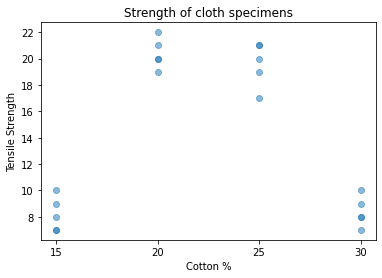

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# we set up the coordinates of the dots
data_set = [
    (7, 15), (7, 15), (9, 15), (8, 15), (10, 15),
    (19, 20),(20, 20), (21, 20), (20, 20), (22, 20),
    (21, 25), (21, 25), (17, 25), (19, 25), (20, 25),
    (8, 30), (7, 30), (8, 30), (9, 30), (10, 30)
]

# we separate the Xs and Ys
X = [x for _, x in data_set]
Y = [y for y, _ in data_set]


fig, ax = plt.subplots()
ax.set_xticks(np.arange(15, 32, 5))

# we use the alpha instead of displacing the dot
# the intenser the dot is, the more points we have
# with that value
ax.scatter(X, Y, alpha=0.5)
plt.title("Strength of cloth specimens")
plt.xlabel('Cotton %')
plt.ylabel('Tensile Strength')
plt.show()

### Stem-and-Leaf Plot

This is a tabular display of data.

To illustrate the construction of such table, consider the following data corresponding to 40 car batteries life rounded to the nearest tenth of a year. The batteries are guaranteed to last 3 years.

| Car Battery Life |
| :--------------- |
| 2.2 4.1 3.5 4.5 3.2 3.7 3.0 2.6 |
| 3.4 1.6 3.1 3.3 3.8 3.1 4.7 3.7 |
| 2.5 4.3 3.4 3.6 2.9 3.3 3.9 3.1 |
| 3.3 3.1 3.7 4.4 3.2 4.1 1.9 3.4 |
| 4.7 3.8 3.2 2.6 3.9 3.0 4.2 3.5 |

To build the table, we have to split each observation into two parts:
+ the stem represents the digit before the decimal point
+ the leaf represents the decimal part

Then, you list the four stems vertically, the leaves are recordded on the right side opposite to the corresponding stem value, and you add another extra column for the frequency which measures how many leaves you have in each stem.

That is:

In [9]:
from math import floor
from decimal import Decimal

data_set = [
 2.2, 4.1, 3.5, 4.5, 3.2, 3.7, 3.0, 2.6,
 3.4, 1.6, 3.1, 3.3, 3.8, 3.1, 4.7, 3.7,
 2.5, 4.3, 3.4, 3.6, 2.9, 3.3, 3.9, 3.1,
 3.3, 3.1, 3.7, 4.4, 3.2, 4.1, 1.9, 3.4,
 4.7, 3.8, 3.2, 2.6, 3.9, 3.0, 4.2, 3.5
]

# we split each data point into its whole and fractional parts
whole_parts = [str(floor(x)) for x in data_set]
frac_parts =  [((Decimal(str(x)) % 1) * 10).to_integral_value().to_eng_string() for x in data_set]

stems = sorted(list(set(whole_parts)))

# now we create the steam-and-leaf structure as a dictionary
# key: stem value
# value: (leaf values, freq)

# We prepopulate the keys, so that they're sorted in the dictionary obj

stem_and_leaf = { stem:("", 0) for stem in stems }

for data_point in zip(whole_parts, frac_parts):
    stem, leaf = data_point
    existing_leaf, existing_freq = stem_and_leaf[stem]
    stem_and_leaf[stem] = (existing_leaf + leaf, existing_freq + 1)

print(stem_and_leaf)

# now we clean the leaves a little bit, as it is customary to show them sorted
def get_sorted_leaf(str):
    sorted_str = ''.join(sorted(str))
    return sorted_str

for stem in stem_and_leaf:
    leaf, freq = stem_and_leaf[stem]
    stem_and_leaf[stem] = (get_sorted_leaf(leaf), freq)

print(stem_and_leaf)

{'1': ('69', 2), '2': ('26596', 5), '3': ('5270413817463913172482905', 25), '4': ('15734172', 8)}
{'1': ('69', 2), '2': ('25669', 5), '3': ('0011112223334445567778899', 25), '4': ('11234577', 8)}


All the information is there, now we just need to pretty-print it.

One way to do that is with the `pandas` library, but we need to massage our stem and leaf dictionary a little bit:

+ The keys for the panda data frame should be the columns ('Stem', 'Leaf', 'Frequency')
+ Then you have to group the values by columns

See the following simple example for reference:

In [10]:
import pandas as pd

pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]}, index=['Question 1', 'Question 2'])

,Yes,No
Question 1,50,131
Question 2,21,2


Let's adapt our stem and leaf dictionary to a Data frame so that we can display the results. In our case, we might want to skip the index and treat the all the data we have as data series:

In [11]:
pd.DataFrame({
    "Stems":[stem for stem in stem_and_leaf], 
    "Leaf":[stem_and_leaf[stem][0]for stem in stem_and_leaf],
    "Frequency":[stem_and_leaf[stem][1]for stem in stem_and_leaf]
    })

,Stems,Leaf,Frequency
0,1,69,2
1,2,25669,5
2,3,0011112223334445567778899,25
3,4,11234577,8


And that it is our first Stem-and-leaf diagram.

However, that representation is not very useful, because most of the data is centered on the 3rd stem. When that happens, it is required to create more stems by writing each stem twice and then record the leaves 0, 1, 2, 3, 4 grouped in one stem and 5, 6, 7, 8, 9 for the second. When using this approach you can denote the stems as 1★, 1•, 2★, 2•, etc.

This will result in the following:


In [12]:
from math import floor
from decimal import Decimal
import pandas as pd

data_set = [
 2.2, 4.1, 3.5, 4.5, 3.2, 3.7, 3.0, 2.6,
 3.4, 1.6, 3.1, 3.3, 3.8, 3.1, 4.7, 3.7,
 2.5, 4.3, 3.4, 3.6, 2.9, 3.3, 3.9, 3.1,
 3.3, 3.1, 3.7, 4.4, 3.2, 4.1, 1.9, 3.4,
 4.7, 3.8, 3.2, 2.6, 3.9, 3.0, 4.2, 3.5
]

# we split each data point into its whole and fractional parts
whole_parts = [str(floor(x)) for x in data_set]
frac_parts =  [((Decimal(str(x)) % 1) * 10).to_integral_value().to_eng_string() for x in data_set]

orig_stems = sorted(list(set(whole_parts)))
stems = []
for stem in orig_stems:
    stems.append(stem + '★')
    stems.append(stem + '•')

# now we create the stem-and-leaf structure as a dictionary
# key: stem value
# value: (leaf values, freq)

# We prepopulate the keys, so that they're sorted in the dictionary obj

stem_and_leaf = { stem:("", 0) for stem in stems }

for data_point in zip(whole_parts, frac_parts):
    whole, frac = data_point
    # now we have to select the appropriate stem
    if frac < '5':
        stem = whole + '★'
    else:
        stem = whole + '•'

    existing_leaf, existing_freq = stem_and_leaf[stem]
    stem_and_leaf[stem] = (existing_leaf + frac, existing_freq + 1)

# print(stem_and_leaf)

# # now we clean the leaves a little bit, as it is customary to show them sorted
def get_sorted_leaf(str):
    sorted_str = ''.join(sorted(str))
    return sorted_str

for stem in stem_and_leaf:
    leaf, freq = stem_and_leaf[stem]
    stem_and_leaf[stem] = (get_sorted_leaf(leaf), freq)

pd.DataFrame({
    "Stem": [stem for stem in stem_and_leaf], 
    "Leaf": [stem_and_leaf[stem][0] for stem in stem_and_leaf],
    "Frequency":[stem_and_leaf[stem][1] for stem in stem_and_leaf]
    })

,Stem,Leaf,Frequency
0,1★,,0
1,1•,69,2
2,2★,2,1
3,2•,5669,4
4,3★,001111222333444,15
5,3•,5567778899,10
6,4★,11234,5
7,4•,577,3


Now it is much better, as we see that most of the car batteries life life in the range 3.0 to 3.4.

Note that the steam-and-leaf table is nothing more than a detailed **frequency distribution** table, where the data is grouped into different classes or intervals.

### Histogram

Dividing each class frequency by the total number of observations gives us the proportion of the set of observations in each of the classes. This table of relative frequencies is known as the **relative frequency distribution**.

Let's build this table for the car battery life data:

| Car Battery Life |
| :--------------- |
| 2.2 4.1 3.5 4.5 3.2 3.7 3.0 2.6 |
| 3.4 1.6 3.1 3.3 3.8 3.1 4.7 3.7 |
| 2.5 4.3 3.4 3.6 2.9 3.3 3.9 3.1 |
| 3.3 3.1 3.7 4.4 3.2 4.1 1.9 3.4 |
| 4.7 3.8 3.2 2.6 3.9 3.0 4.2 3.5 |

We can first explore the observation min and max, and from there decide the appropriate intervals:

In [13]:
data_set = [
 2.2, 4.1, 3.5, 4.5, 3.2, 3.7, 3.0, 2.6,
 3.4, 1.6, 3.1, 3.3, 3.8, 3.1, 4.7, 3.7,
 2.5, 4.3, 3.4, 3.6, 2.9, 3.3, 3.9, 3.1,
 3.3, 3.1, 3.7, 4.4, 3.2, 4.1, 1.9, 3.4,
 4.7, 3.8, 3.2, 2.6, 3.9, 3.0, 4.2, 3.5
]

print(f"data set min={min(data_set)}")
print(f"data set max={max(data_set)}")

data set min=1.6
data set max=4.7


As data ranges from 1.6 to 4.7, it feels natural to select the following intervals:
+ 1.5 - 1.9
+ 2.0 - 2.4
+ 2.5 - 2.9
+ 3.0 - 3.4
+ 3.5 - 3.9
+ 4.0 - 4.4
+ 4.5 - 4.9


The Relative Frequency Distribution table will be created calculating for each interval:
+ the midpoint for the interval
+ the frequency (number of observations in that interval)
+ the relative frequency (num of observations in that interval / total observations)

Let's build that table:

In [14]:
from decimal import Decimal
import numpy as np
import pandas as pd

intervals=[(interval_start, interval_start + 0.4) for interval_start in np.arange(1.5, 5.0, 0.5)]
frequencies={(interval_start, interval_end):0 for interval_start, interval_end in intervals}
num_observations = len(data_set)

for data_point in data_set:
    for interval_start, interval_end in intervals:
        if data_point >= interval_start and data_point <= interval_end:
            frequencies[(interval_start, interval_end)] = frequencies[(interval_start, interval_end)] + 1
            break

df = pd.DataFrame({
    'Class Interval': [f'{interval_start}-{interval_end}' for interval_start, interval_end in intervals], 
    'Class Midpoint': [interval_start + (interval_end - interval_start) / 2 for interval_start, interval_end in intervals], 
    'Frequency': [frequencies[(interval_start, interval_end)] for interval_start, interval_end in intervals], 
    'Relative Frequency': [frequencies[(interval_start, interval_end)] / num_observations for interval_start, interval_end in intervals ]
    })
df
# print(df['Class Interval'].to_list())
# print(df['Relative Frequency'].to_list())

,Class Interval,Class Midpoint,Frequency,Relative Frequency
0,1.5-1.9,1.7,2,0.050
1,2.0-2.4,2.2,1,0.025
2,2.5-2.9,2.7,4,0.100
3,3.0-3.4,3.2,15,0.375
4,3.5-3.9,3.7,10,0.250
5,4.0-4.4,4.2,5,0.125
6,4.5-4.9,4.7,3,0.075


This information can be plotted in a Relative Frequency Histogram. While Matplotlib supports plotting histograms out of the box, that capability will only plot the frequency of the data, and not the relative frequency.

As a result, a simple bar chart is more appropriate in this case:

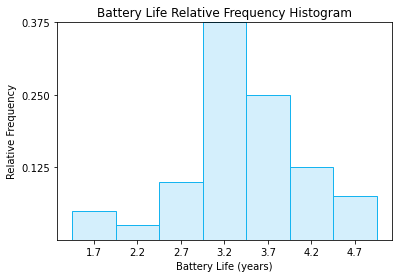

In [15]:
import matplotlib.pyplot as plt

x_midpoints = df['Class Midpoint'].to_list()
y_heights = df['Relative Frequency'].to_list()

plt.bar(x_midpoints, y_heights, align='center', width=0.5, color='#D4EFFC', edgecolor='#15B4F0')
plt.xlabel('Battery Life (years)')
plt.ylabel('Relative Frequency')
plt.title('Battery Life Relative Frequency Histogram') 
plt.xticks(x_midpoints)
plt.yticks([0.125, 0.250, 0.375])
plt.ylim([0, 0.375])
plt.grid(False)

Many continuous frequency distributions can be represented by the characteristic bell-shaped curve. The data from the previous data set happens to be like that, as we can see in the following plot in which we overlay a bell-shaped curve in the relative frequency histogram:

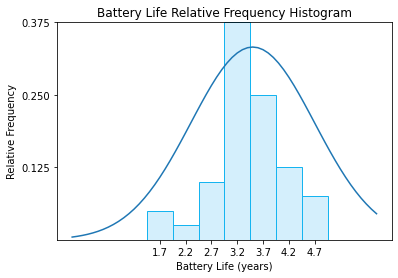

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.bar(x_midpoints, y_heights, align='center', width=0.5, color='#D4EFFC', edgecolor='#15B4F0')
plt.xlabel('Battery Life (years)')
plt.ylabel('Relative Frequency')
plt.title('Battery Life Relative Frequency Histogram') 
plt.xticks(x_midpoints)
plt.yticks([0.125, 0.250, 0.375])
plt.ylim([0, 0.375])

# overlaying the normal distribution on the existing plot
# it's been manually built, only for visualization purposes
x_axis = np.arange(0, 6, 0.1)
plt.plot(x_axis, norm.pdf(x_axis, 3.5, 1.2))

plt.grid(False)


A distribution is said to be symmetric if it can be folded along a vertical axis so that the two sides coincide.

A distribution that lacks symmetry with respect to a vertical axis is said to be skewed.

### Box-and-Whisker Plot or Box Plot

A Box-and-Whisker plot encloses the interquantile range of the data in a box that has the median displayed within. The interquantile range has as its extremes the 75th percentile (upper quartile) and the 25th percentile (lower quartile).

In addition to the box, *whiskers* extend, showing extreme observations in the sample. As a result, this chart gives you a godd visualization about the center of location, variability, and the degree of asymmetry of the sample.

A variation called **box plot** can provide additional information about the observations that may be outliers.

Outliers are observations that are considered to be unusually far from the bulk of data. This would represent a *rare event* (there is a small probability of obtaining a value that far from the bulk of data). For example, if the distance from the box to the data point exceeds 1.5 the interquantile range, the observation may be labeled an outlier.


For example, consider the following table listing the nicotine content measured in a random sample of 40 cigarettes:

| Nicotine Data |
| :------------ |
| 1.09 1.92 2.31 1.79 2.28 1.74 1.47 1.97 | 
| 0.85 1.24 1.58 2.03 1.70 2.17 2.55 2.11 |
| 1.86 1.90 1.68 1.51 1.64 0.72 1.69 1.85 |
| 1.82 1.79 2.46 1.88 2.08 1.67 1.37 1.93 |
| 1.40 1.64 2.09 1.75 1.63 2.37 1.75 1.69 |


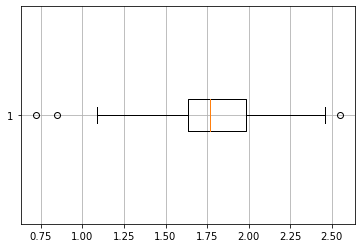

In [17]:
import matplotlib.pyplot as plt

data_set = [
    1.09, 1.92, 2.31, 1.79, 2.28, 1.74, 1.47, 1.97,
    0.85, 1.24, 1.58, 2.03, 1.70, 2.17, 2.55, 2.11,
    1.86, 1.90, 1.68, 1.51, 1.64, 0.72, 1.69, 1.85,
    1.82, 1.79, 2.46, 1.88, 2.08, 1.67, 1.37, 1.93,
    1.40, 1.64, 2.09, 1.75, 1.63, 2.37, 1.75, 1.69]

plt.boxplot(data_set, vert=False, whis=1.6)
plt.grid(True)
plt.show()

The red line is the median, which is approximately 1.75. The box's left edge shows the lower quartile, and the box's right edge shows the upper quartile. Therefore, the bulk of the data lies between the median and the upper quartile.

The whiskers extend from the box to augment the range of data, and points are depicted for the observations found beyond the whiskers. In this case, 2.55, 0.72 and 0.85 are considered outliers.

| NOTE: |
| :---- |
| The default values for Matplotlib box plot has been altered to make it look like the book's chart. |

### Other distinguishing features of a sample

While the median divides the data into two parts, other measures, such as **quartiles** can be used to divide the samples into four parts.

The **third quartile** separates the upper quarter of the data from the rest, the **second quartile** being the median, and the **first quartile** separating the lower quarter of the data from the rest.

The distribution can be more finely divided by computing the **percentiles** of the distribution. These quantities give the analyst a sense of the so-called *tails* of the distribution (i.e. values that are relatively extreme, either small or large). 

For example, the 95th percentile separates the highest 5% from the bottom 95%. 

Similar definitions prevail for extremes on the lower side of the distribution. For example, 1st percentile separates the bottom 1% from the rest of the distribution.

For example, the 1st, 25th, 50th, 75th, and 95th percentile from the nicotine values found in 40 cigarette samples are computed below.

In [18]:
import numpy as np

data_set = [
    1.09, 1.92, 2.31, 1.79, 2.28, 1.74, 1.47, 1.97,
    0.85, 1.24, 1.58, 2.03, 1.70, 2.17, 2.55, 2.11,
    1.86, 1.90, 1.68, 1.51, 1.64, 0.72, 1.69, 1.85,
    1.82, 1.79, 2.46, 1.88, 2.08, 1.67, 1.37, 1.93,
    1.40, 1.64, 2.09, 1.75, 1.63, 2.37, 1.75, 1.69]

np.percentile(data_set, [1, 25, 50, 75, 95])

array([0.7707, 1.6375, 1.77  , 1.985 , 2.3745])

This can be read as:
+ Only 1% of the data falls below 0.77; consequently, 99% of the data is greater than 0.77
+ 25% of the data falls below 1.63; consequently, 75% of the data is greater than 1.63
+ 50% of the data falls below 1.77; consequently, 50% of the data is greater than 1.77
+ 75% of the data falls below 1.985, consequently, only 25% of the data is greater than 1.985
+ 95% of the data falls below 2.3, consequently, only 5% of the data is greater than 2.3


## You know you've mastered this chapter when...
+ You're familiar with terms such as **samples**, **observations**, **populations**, **designed**, **observational**, and **comparative studies**.
+ You can elaborate about the differences between **descriptive and inferencial statistics**.
+ You can calculate the **sample mean** and **sample median** of a data set, and understand what they mean and their differences as **measures of location**.
+ You can calculate the **trimmed mean** of a set of observations and understand when it is useful (i.e. removes outliers).
+ You can calculate the **sample range**, **sample variance**, and **sample standard deviation**. You're familiar with the units for those measures of variability.
+ You know about the term **degrees of freedom** of a sample, when computing the standard deviation of a sample.
+ You're aware that data in a sample can be **discrete** (is the subject younger than 18 or not) or **continuous** (subject's age).
+ You can draw and interpret:
  + **dot-plots**
  + **scatter plots**
  + **stem-and-leaf tables**
  + **histograms**
  + **box-and-whiskers/box plots**
+ You can build relative frequency tables.
+ You're getting fluent with NumPy, Matplotlib, function definitions, list comprehensions, and basic Pandas.
+ You're getting familiar with LaTeX for rendering formulas in the notebook's cells.